## Weekly Project 3

# Implementation of stereo block matching
This week you'll be implementing your own block matching algorithm for stereo depth reconstruction. Thus you are not allowed to use cv2.matchTemplate, cv2.stereoBM or similar functions from opencv or other pre-existing libraries. You can find all necessary image-files in the attached zip-file.

It is recommended you use the following three intermediate steps before going directly to a full implementation:

## Intermediate step 1
Implement a function that takes two equal size images and calculates the sum of absolute differences. The two equal-sized images are nose_left.png (used as the template) and nose_right.png.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def SAD(left, right):
    left = left.astype(np.int32)
    right = right.astype(np.int32)
    return np.sum(np.abs(left - right))

path = "C:/Users/shaia/Documents/Opgaveregning/AutoSys/4. semester/Perception for autonome systemer/Projekt 3/"

imgLeft = cv2.imread(path + "nose_left.png")
imgRight = cv2.imread(path + "nose_right.png")

grayLeft = cv2.cvtColor(imgLeft, cv2.COLOR_BGR2GRAY)
grayRight = cv2.cvtColor(imgRight, cv2.COLOR_BGR2GRAY)

sumSAD = SAD(grayLeft, grayRight)
print(f"The sum of absolute difference is {sumSAD}")

The sum of absolute difference is 7657


## Intermediate step 2
Using the function you just created, find which of the three images nose1.png, nose2.png, nose3.png gives the best match to nose_left.png?

In [3]:
img1 = cv2.imread(path + "nose1.png")
img2 = cv2.imread(path + "nose2.png")
img3 = cv2.imread(path + "nose3.png")

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

sumSAD1 = SAD(grayLeft, gray1)
sumSAD2 = SAD(grayLeft, gray2)
sumSAD3 = SAD(grayLeft, gray3)

print(f"Sum SAD 1: {sumSAD1}")
print(f"Sum SAD 2: {sumSAD2}")
print(f"Sum SAD 3: {sumSAD3}")

Sum SAD 1: 1361
Sum SAD 2: 119
Sum SAD 3: 1490


## Intermediate step 3
Since these images are rectified, we can approximately assume that a pixel found in row x in the left image also lives in row x in the right image. nose_span.png contains the entire row containing the nose of the sculpture. The height of the span is 7 - the same height as your template. Write a function that loops through the image from left to right and computes the correlation using your function from step 1 to find where in the span the nose is located.

In [4]:
def spanSAD(template, image):
    matSAD = np.zeros((image.shape[1] - template.shape[1] + 1, 1))
    for col in range(matSAD.shape[0]):
        matSAD[col] = SAD(template, image[:, col:col + template.shape[1]])
    
    return matSAD

imgSpan = cv2.imread(path + "nose_span.png")
imgSpan = cv2.cvtColor(imgSpan, cv2.COLOR_BGR2RGB)
graySpan = cv2.cvtColor(imgSpan, cv2.COLOR_RGB2GRAY)

spanResult = spanSAD(grayLeft, graySpan)
best_match = np.argmin(spanResult)
image_match = cv2.rectangle(imgSpan.copy(), (best_match, 0), (best_match + grayLeft.shape[1], 6), (255, 0, 0), 1)

plt.imshow(image_match)
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

## Full template matching implementation (Challenge)
Write a template matching function that iteratively takes a 7x7 subpart (numpy calls this slicing) of tsukuba_left.png and uses your function from step 3 to apply it to the corresponding row in tsukuba_right.png and stores the lowest/best matching disparity value for that template. Continue until all possible templates for a row has been used before moving down to the next row in the image.

(([], []), ([], []))

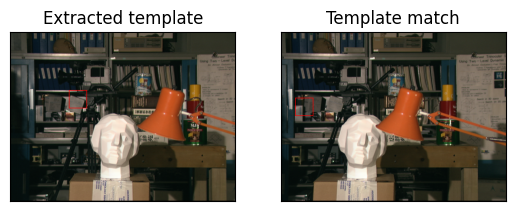

In [5]:
imgLeftNew = cv2.imread(path + "tsukuba_left.png")
imgRightNew = cv2.imread(path + "tsukuba_right.png")

imgLeftNew = cv2.cvtColor(imgLeftNew, cv2.COLOR_BGR2RGB)
imgRightNew = cv2.cvtColor(imgRightNew, cv2.COLOR_BGR2RGB)

grayLeftNew = cv2.cvtColor(imgLeftNew, cv2.COLOR_RGB2GRAY)
grayRightNew = cv2.cvtColor(imgRightNew, cv2.COLOR_RGB2GRAY)

template = grayLeftNew[100:130, 100:130]
template_area = cv2.rectangle(imgLeftNew.copy(), (100, 100), (130, 130), (255, 0, 0), 1)

location = np.zeros((grayRightNew.shape[0] - template.shape[0], 1))
for row in range(location.shape[0]):
    span = spanSAD(template, grayRightNew[row:row + template.shape[0], :])
    location[row] = np.argmin(span)

best_match = np.argmin(location)
image_match = cv2.rectangle(imgRightNew.copy(), (np.int64(location[best_match][0]), best_match), (np.int64(location[best_match][0]) + template.shape[0], best_match + template.shape[1]), (255, 0, 0), 1)

plt.subplot(1, 2, 1)
plt.imshow(template_area)
plt.title('Extracted template')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(image_match)
plt.title('Template match')
plt.xticks([]), plt.yticks([])